# PCA and UMAP Visualization

In [1]:
import sys
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelBinarizer as labi

sys.path.append(f'../utils')
import analysis_utils as au
import preprocess_utils as ppu

/home/camo/anaconda3/envs/nf1_analysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess data using preprocess utils

In [2]:
filename = 'nf1_sc_all_cellprofiler.csv.gz'
base_path = Path("../nf1_benchmark_repo/4_processing_features/data")
ending_path = Path("CellProfiler/nf1_sc_all_cellprofiler.csv.gz")
plates = {}

plates['1'], plates['2'] = {"path": base_path / "Plate1" / ending_path}, {"path": base_path / "Plate2" / ending_path}

In [3]:
for plate, vals in plates.items():
    # Initializes the preprocessing class
    po = ppu.Preprocess_data(path=vals['path'])
    
    # Gets the dataframe after removing metadata columns, 
    # except for the 'Metadata_genotype' column specified above
    platedf = po.remove_meta(po.df, kept_meta_columns=['Metadata_genotype'])
    
    platedf['labels'] = platedf['Metadata_genotype'] + plate
    platedf.drop(['Cytoplasm_Number_Object_Number','Metadata_genotype'], axis=1, inplace=True)
    
    plates[plate]['df'] = platedf

# Combining Data

In [4]:
plate1df = plates['1']['df']
plate2df = plates['2']['df']

In [5]:
platescomb = pd.concat([plate1df, plate2df], axis=0)

plateswt = platescomb.loc[~platescomb['labels'].str.contains('Null')]
platesnull = platescomb.loc[~platescomb['labels'].str.contains('WT')]

In [6]:
plateswt = platescomb[~platescomb.iloc[:,-1].str.contains('Null')]
platesnull = platescomb[~platescomb.iloc[:,-1].str.contains('WT')]

# Visualization

In [7]:
out_path = Path('figures')

if not out_path.exists():
    out_path.mkdir(parents=True, exist_ok=True)

Explained variance in PC1 and PC2 = 0.9028702039760036


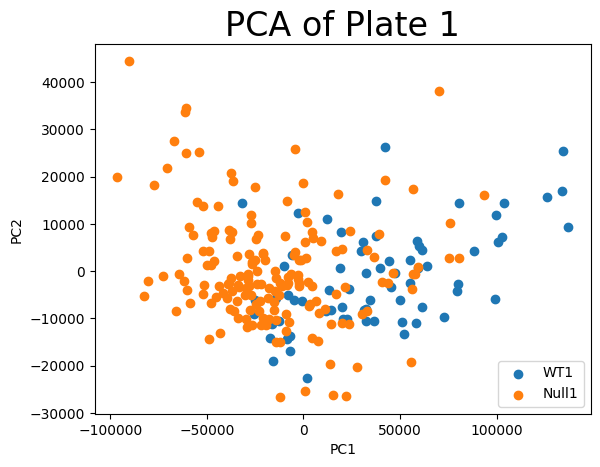

In [8]:
save_args = {'fname': out_path / 'pca_plate1'}
au.plot_pca(feats=plate1df.drop('labels', axis=1), labels=plate1df['labels'], save_args=save_args, title='PCA of Plate 1')

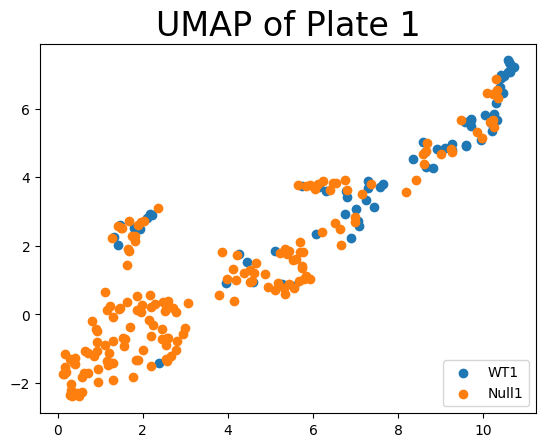

In [9]:
save_args = {'fname': out_path / 'umap_plate1'}
au.plot_umap(feats=plate1df.drop('labels', axis=1), labels=plate1df['labels'], save_args=save_args, title='UMAP of Plate 1')

Explained variance in PC1 and PC2 = 0.9548779367233083


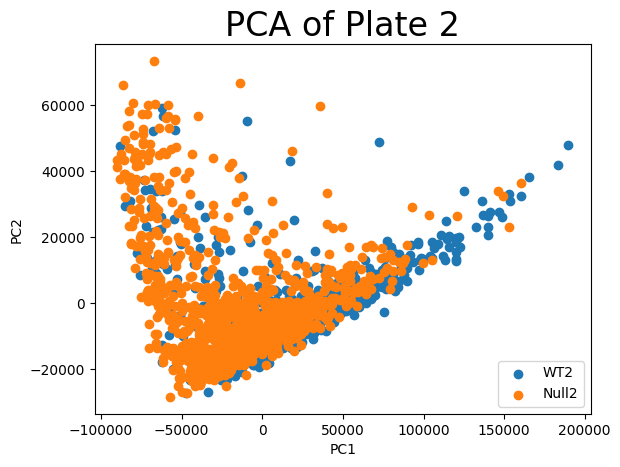

In [10]:
save_args = {'fname': out_path / 'pca_plate2'}
au.plot_pca(feats=plate2df.drop('labels', axis=1), labels=plate2df['labels'], save_args=save_args, title='PCA of Plate 2')

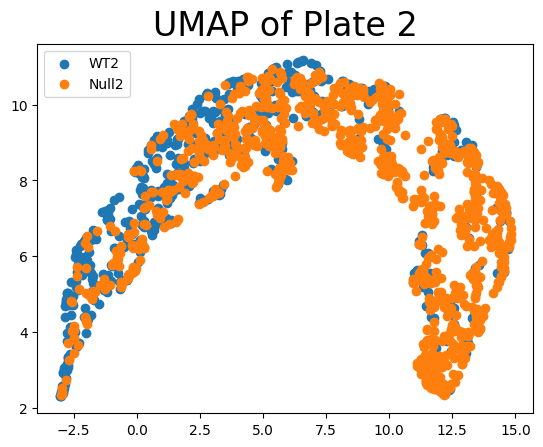

In [11]:
save_args = {'fname': out_path / 'umap_plate2'}
au.plot_umap(feats=plate2df.drop('labels', axis=1), labels=plate2df['labels'], save_args=save_args, loc='upper left', title='UMAP of Plate 2')

Explained variance in PC1 and PC2 = 0.932697478230295


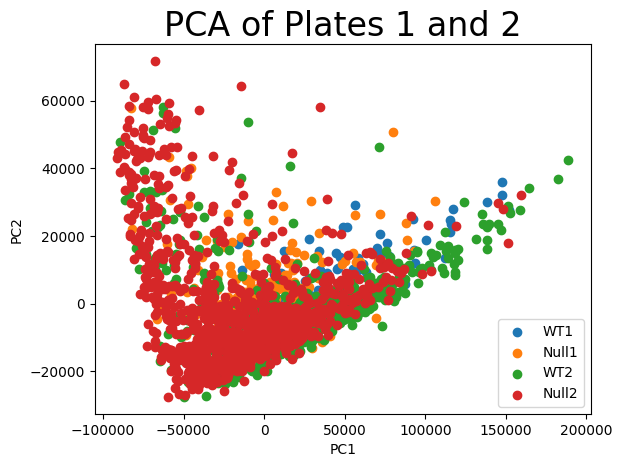

In [12]:
save_args = {'fname': out_path / 'pca_plates_1_2'}
au.plot_pca(feats=platescomb.drop('labels', axis=1), labels=platescomb['labels'], save_args=save_args, title='PCA of Plates 1 and 2')

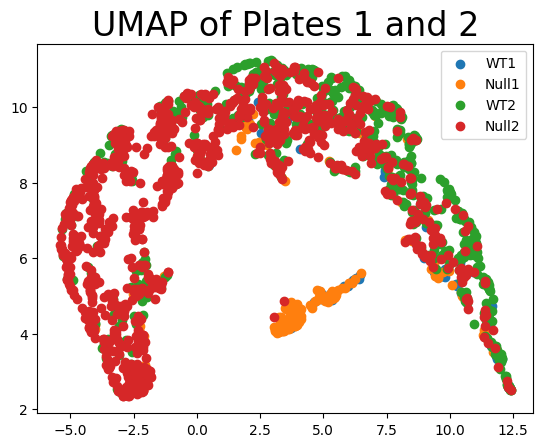

In [13]:
save_args = {'fname': out_path / 'umap_plates_1_2'}
au.plot_umap(feats=platescomb.drop('labels', axis=1), labels=platescomb['labels'], save_args=save_args, loc='upper right', title='UMAP of Plates 1 and 2')

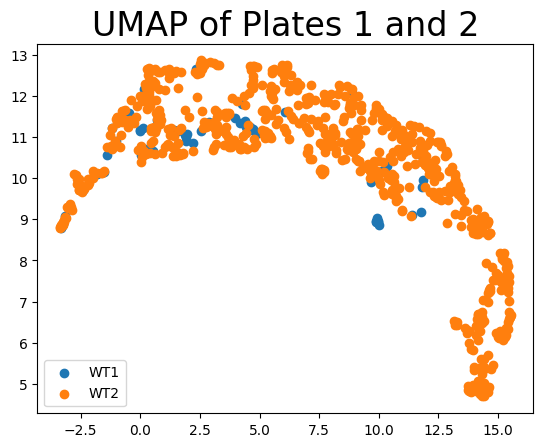

In [14]:
save_args = {'fname': out_path / 'umap_wt_plates_1_2'}
au.plot_umap(feats=plateswt.drop('labels', axis=1), labels=plateswt['labels'], save_args=save_args, loc='lower left', title='UMAP of Plates 1 and 2')

Explained variance in PC1 and PC2 = 0.9470735242706637


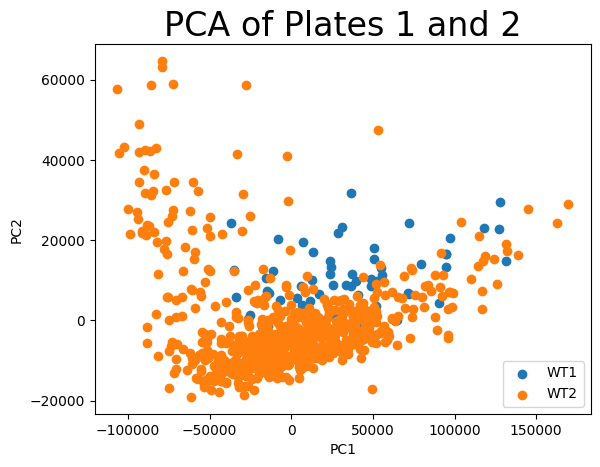

In [15]:
save_args = {'fname': out_path / 'pca_wt_plates_1_2'}
au.plot_pca(feats=plateswt.drop('labels', axis=1), labels=plateswt['labels'], save_args=save_args, title='PCA of Plates 1 and 2')

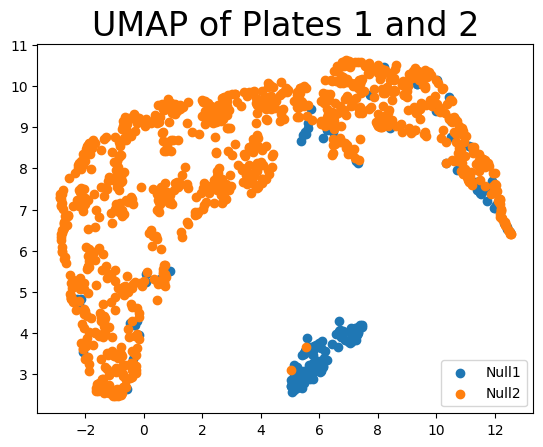

In [16]:
save_args = {'fname': out_path / 'umap_null_plates_1_2'}
au.plot_umap(feats=platesnull.drop('labels', axis=1), labels=platesnull['labels'], save_args=save_args, title='UMAP of Plates 1 and 2')

Explained variance in PC1 and PC2 = 0.9076369240870632


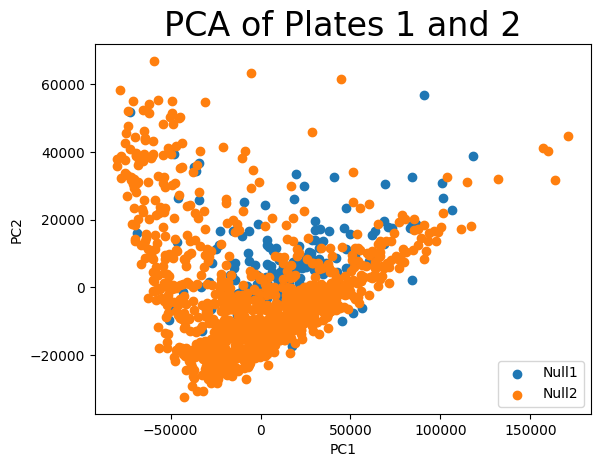

In [17]:
save_args = {'fname': out_path / 'pca_null_plates_1_2'}
au.plot_pca(feats=platesnull.drop('labels', axis=1), labels=platesnull['labels'], save_args=save_args, title='PCA of Plates 1 and 2')